<a href="https://colab.research.google.com/github/InesAgudoMartin/UFV-visualizaci-n/blob/main/Ejercicios%20de%20clase/Ejercicio_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PRÁCTICA 1: VENTAS EN EUROPA

Esta base de datos con la que vamos a trabajar muestra ventas reales y proyectadas por país y submarca, organizadas por mes. Incluye el año, mes, tipo de escenario (reales o predicciones), tipo de pronóstico y la cantidad de ventas. Es muy útil para analizar patrones y proyecciones de ventas en distintos mercados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/InesAgudoMartin/UFV-visualizaci-n/refs/heads/main/Ejercicios%20de%20clase/datos_ejercicio_ventas.csv?token=GHSAT0AAAAAACZ6ADAUY7DK54HLLNYHFDWQZZKKN6Q"
nombre = 'datos_ejercicio_ventas.csv'
# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
     # Guardar el contenido del archivo en un archivo local
    with open(nombre, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

df = pd.read_csv(nombre)
df.head(10)

Archivo descargado exitosamente.


,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,7.543562e+05
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,5.600306e+05
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,8.850198e+04
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,3.632245e+05
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,3.961761e+05
5,Norway,Pepsi Regular (L3),2025,2,AI_forecast,AI_P09F,2023.0,2.667267e+04
6,Denmark,7up (L3),2023,12,AI_forecast,AI_PF,2023.0,0.000000e+00
7,Netherlands,Mountain Dew (L3),2024,4,AI_forecast,AI_P02F,2023.0,0.000000e+00
8,Great Britain,Pepsi Max (L3),2023,9,AI_forecast,AI_P02F,2023.0,1.138557e+07
9,Italy,Pepsi Regular (L3),2023,4,AI_forecast,AI_P03F,2023.0,2.074742e+06


**NÚMERO DE FILAS**

Queremos saber cuántos registros totales tenemos en la base de datos. Cada fila representa datos específicos de ventas en un país, submarca y mes.
Esto  nos ayuda a entender el tamaño de la información disponible y si tenemos suficientes datos para analizar tendencias.

Esta función nos devuelve el número de filas y de columnas pero al especificar [0], estamos pidiendo solo las filas, luego nos muestra la cantidad.

In [ ]:
num_filas = df.shape[0]
print("Número de filas:", num_filas)

Número de filas: 18666


Es decir, tenemos una cantidad significativa de registros de ventas, lo que nos permite un análisis detallado sobre tendencias, estacionalidades... ya que tenemos suficiente información.

**NÚMERO DE 'ACTUAL' Y 'AI_FORECAST'**

Ahora nos interesa cuántos registros son "actual" y cuántos son "AI_forecast" en la columna 'SCENARIO', para entender la proporción entre datos reales y predicciones en la base de datos,así vemos si tenemos un equilibrio o si predominan más las predicciones sobre los datos reales (o al revés) en el análisis de ventas.

Lo que hacemos es contar las veces que aparecen (por separado) "actual" y "AI_forecast" en la columna SCENARIO, y se muestra la cantidad correspondiente a cada tipo.

In [ ]:
#contamos las veces que aparecen
scenario = df['SCENARIO'].value_counts()

# mostramos resultados
actual = scenario.get('actual', 0)
ai_forecast = scenario.get('AI_forecast', 0)

print(f"Número de 'actual': {actual}")
print(f"Número de 'AI_forecast': {ai_forecast}")


Número de 'actual': 900
Número de 'AI_forecast': 17766


Podmeos observar que en esta base de datos la mayoría de ellos son predicciones en lugar de ventas reales. Es decir, trabajaremos sobre todo con datos proyectados para analizar posibles tendencias futuras, aunque la cantidad de datos reales es limitada para hacer comparaciones.

**HORIZONTE DE PREDICCIÓN**


Es el período futuro para el cual se realizan proyecciones de ventas. Es decir, hasta qué punto en el tiempo esperamos las ventas estimadas para evaluar tendencias y cambios previstos.

En este caso buscamos analizar las proyecciones de ventas futuras para un producto específico en un país, empezando desde una fecha concreta. Queremos ver cómo se espera que cambien las ventas de ese producto en el futuro según las predicciones.

Con esto evaluamos la consistencia y alcance de las proyecciones en nuestra base de datos, entendiendo y comprobando lo lejos que llegan las predicciones y si siguen una tendencia clara para ese producto y país.

En este caso queremos ver las proyecciones futuras de "Pepsi Max" en España en el periodo específico "AI_P09F". Con lo cual, seleccionamos el país de la columna 'COUNTRY', el tipo de columna 'SCENARIO' que sabemos que estamos en pronóstico porque estamos estudiando predicciones futuras, y por último se especifica el periodo seleccionado. Contamos todos los registros cumplen todas estas condiciones para poder obtener el horizonte de predicción.

In [ ]:
pepsi = df[df['SUBBRAND'] == 'Pepsi Max (L3)']
pepsi_spain = pepsi[pepsi['COUNTRY'] == 'Spain']
pepsi_spain_ai_forecast = pepsi_spain[pepsi_spain['SCENARIO'] == 'AI_forecast']
pepsi_spain_ai_forecast_P09F = pepsi_spain_ai_forecast[pepsi_spain_ai_forecast['FORECAST'] == 'AI_P09F']
pepsi_spain_ai_forecast_P09F.count()

,0
COUNTRY,72
SUBBRAND,72
YEAR,72
MONTH,72
SCENARIO,72
FORECAST,72
FORECAST_YEAR,72
AMOUNT,72


La base de datos tiene **72 combinaciones únicas** de país, submarca, año, mes y tipo de pronóstico. Esto significa que para cada país y submarca en cada mes y año, hay un solo valor de ventas, lo que hace que sea fácil analizar las ventas para cada caso específico a lo largo del tiempo.

El número depende del producto, país y período específico elegido. Si hubiésemos escogido un producto, país o período diferente, el número cambia porque no todas las combinaciones tienen la misma cantidad de datos. Cada combinación tiene sus propios registros según los datos disponibles en la base.

**NÚMERO DE PAÍSES Y DE PRODUCTOS**

Queremos obtener la cantidad de países diferentes que aparecen en la base de datos y los productos que tenemos (sin repetir). Es decir, en cuántos países se recopilan datos de ventas y cuántas variedades de productos se analizan.

Con la función 'unique' contamos los valores únicos, es decir, que no se repitan, en dichas columnas y nos devuelve los países y productos buscados.

In [ ]:
unique_countries = df['COUNTRY'].nunique()
unique_subbrands = df['SUBBRAND'].nunique()

unique_countries, unique_subbrands

(9, 6)

Tenemos **9 países únicos** y **6 productos distintos**. Los datos de ventas abarcan 9 ubicaciones geográficas y cubren 6 variedades de productos, lo que nos permite analizar cómo se comportan las ventas en diferentes mercados y productos.

**HISTÓRICO DE ACTUALS Y FORECAST**

Ahora queremos encontrar el primer y último registro de cada tipo en la columna `SCENARIO`, junto con los años en que aparecen. Esto nos dice desde qué año empiezan y hasta qué año llegan los datos reales y las predicciones. Así podemos entender el período cubierto por las ventas reales y hasta dónde alcanzan las predicciones en el tiempo, para saber si hay suficientes datos para analizar tanto el pasado como las proyecciones futuras.

Lo hacemos por separado, por un lado para las proyecciones y por otro para los datos actuales. Después, localizamos la primera y la última fecha (año y mes) en que aparece cada grupo. Así sabemos desde qué fecha empiezan y hasta cuándo llegan los datos reales y las predicciones en el tiempo.

In [ ]:
# AI_forecast
forecast_df = df[df['SCENARIO'] == 'AI_forecast']

# año y mes mínimo
min_forecast_year = forecast_df['YEAR'].min()
max_forecast_year = forecast_df['YEAR'].max()

min_forecast_month = forecast_df[forecast_df['YEAR'] == min_forecast_year]['MONTH'].min()
max_forecast_month = forecast_df[forecast_df['YEAR'] == max_forecast_year]['MONTH'].max()

(min_forecast_year, min_forecast_month), (max_forecast_year, max_forecast_month)


((2023, 1), (2025, 5))

In [ ]:
# actual
actual_df = df[df['SCENARIO'] == 'actual']  # Cambié df a data

# año y mes mínimo
min_actual_year = actual_df['YEAR'].min()
max_actual_year = actual_df['YEAR'].max()

min_actual_month = actual_df[actual_df['YEAR'] == min_actual_year]['MONTH'].min()
max_actual_month = actual_df[actual_df['YEAR'] == max_actual_year]['MONTH'].max()

(min_actual_year, min_actual_month), (max_actual_year, max_actual_month)


((2023, 1), (2024, 8))

Para el caso de las predicciones, el primer registro es en enero de 2023 y el último es em mayo de 2025. Es decir, las predicciones de ventas abarcan desde principios de 2023 hasta mediados de 2025, lo que nos da un rango de dos años y medio para las previsiones futuras.

Para los actuales vemos que empiezan en el mismo mes que las predicciones, pero cubren hasta un año y medio, terminando en agosto de 2024. Hay una buena cantidad de datos actuales en un rango más corto en comparación con las predicciones, que se extienden más allá del periodo de los datos reales.

**CUÁNTOS FORECAST (teniendo en cuenta el año)**

Este caso se refiere a cuántos tipos diferentes de pronósticos hay en la base de datos, pero solo contando cada tipo de pronóstico una vez por año.
Es decir, si un pronóstico específico aparece en varios años, solo se cuenta una vez por cada año en el que aparece. Con esto vemos cuántas variantes de pronósticos se han utilizado a lo largo de los años y cómo se distribuyen en el tiempo.

In [ ]:
unique_forecast = df['FORECAST'].nunique()
print("Número de valores únicos en la columna FORECAST:", unique_forecast)

Número de valores únicos en la columna FORECAST: 12


Se han utilizado 12 tipos diferentes de pronósticos en la base de datos para estimar las ventas. Lo que nos indica que a lo largo del tiempo, se han aplicado varias técnicas para hacer estas predicciones.

Tener 12 pronósticos distintos nos permite comparar cómo cada modelo se desempeña en diferentes situaciones y períodos, de cara a ver qué métodos son más efectivos y confiables para prever ventas.

**DISTRIBUCIÓN DE VENTAS REALIZADAS**

En este apartado queremos analizar cómo se reparten las ventas efectivas (la cantidad de ventas que realmente se concretaron) en la base de datos. Es decir, examinar los datos para ver cuántas ventas se hicieron, en qué cantidades, y cómo se distribuyen en diferentes categorías, como países, productos o períodos de tiempo (por ejemplo, meses y años).

Nuestro objetivo es entender mejor los patrones de venta: por ejemplo, identificar qué productos se venden más, cuáles países tienen más ventas y si hay variaciones estacionales (como más ventas en ciertas épocas del año).

**HISTOGRAMA**

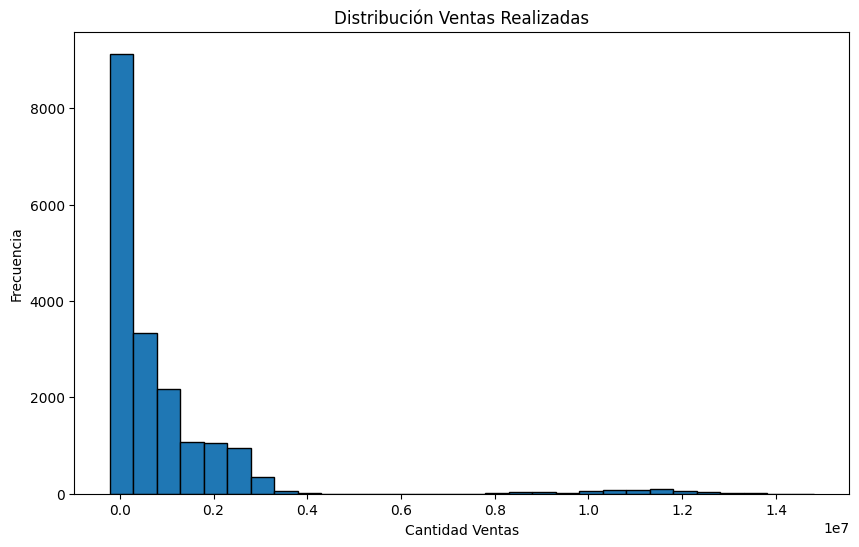

In [ ]:
if 'AMOUNT' in df.columns:
    # Graficamos la distribución
    plt.figure(figsize=(10, 6))
    plt.hist(df['AMOUNT'], bins=30, edgecolor='black')
    plt.title('Distribución Ventas Realizadas')
    plt.xlabel('Cantidad Ventas')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("La columna 'AMOUNT' no está en la base de datos.")

La mayoría de las ventas se concentran en cantidades cercanos a cero, con más de 8,000 registros en el primer rango. Esto nos indica que muchos productos tienen ventas bajas o que un gran número de transacciones son de bajo valor.

Pocemos ver que a medida que avanzamos hacia cantidades más altos, la frecuencia de ventas disminuye drásticamente. Es decir, las ventas más elevadas son menos comunes, lo que es típico en muchos contextos comerciales, donde unos pocos productos pueden generar ingresos significativos mientras que muchos otros tienen ventas mínimas.

Aunque la mayoría de las ventas son bajas, hay algunas ventas que alcanzan hasta los 10 millones, como se puede comprobar en las últimas barras. Porque hay productos que pueden tener un impacto significativo en las ventas totales.

Con este histograma tenemos visión clara de cómo se distribuyen las ventas en la base de datos, ayudando a identificar tanto los productos de bajo rendimiento como aquellos que tienen un gran potencial de ingresos.

**GRÁFICO VENTAS POR MES**

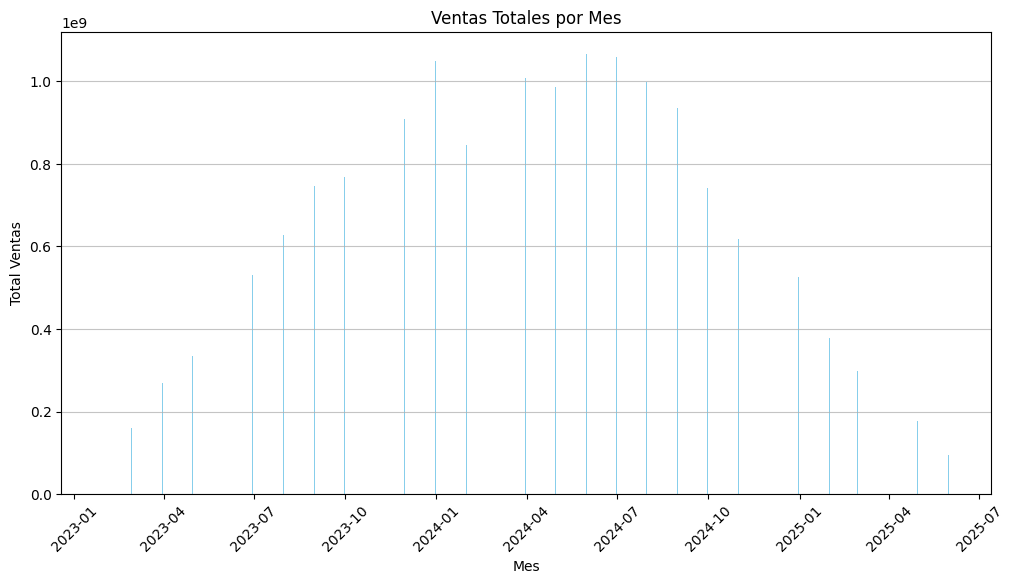

In [ ]:
df['MONTH'] = df['MONTH'].astype(int)

# nueva columna fecha DATE
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))

ventas_por_mes = df.groupby(df['DATE'].dt.to_period('M'))['AMOUNT'].sum().reset_index()
ventas_por_mes['DATE'] = ventas_por_mes['DATE'].dt.to_timestamp(freq = 'M')
ventas_por_mes['DATE_Y_M'] = ventas_por_mes['DATE'].dt.strftime('%Y-%m')


# representamos
plt.figure(figsize=(12, 6))
plt.bar(ventas_por_mes['DATE'], ventas_por_mes['AMOUNT'], color='skyblue')
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Total Ventas')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

Podemos notar una tendencia en forma de campana, con un incremento gradual en las ventas a lo largo de los primeros meses, llegando un pico más o menos a mediados de 2024, y luego una disminución lenta hacia mediados de 2025.

Esto nos indica que las ventas tuvieron un fuerte impulso en la mitad del periodo y luego comenzaron a decaer.

In [ ]:
ventas_por_mes[['DATE_Y_M', 'AMOUNT']]

,DATE_Y_M,AMOUNT
0,2023-01,9.310165e+07
1,2023-02,1.612275e+08
2,2023-03,2.696923e+08
3,2023-04,3.353694e+08
4,2023-05,4.550054e+08
5,2023-06,5.304364e+08
6,2023-07,6.288473e+08
7,2023-08,7.474676e+08
8,2023-09,7.679450e+08
9,2023-10,7.890140e+08


**GRÁFICO BARRAS POR PAÍS**


Agrupamos las ventas por país y las sumamos (rotamos el eje x para una mejor visualización)


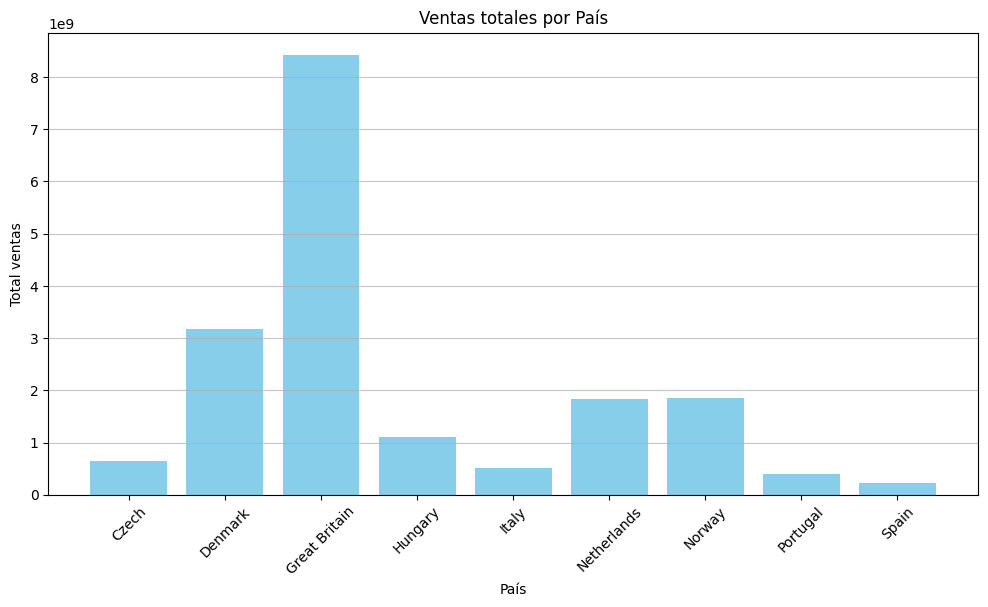

In [ ]:
ventas_pais = df.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

#gráfico
plt.figure(figsize=(12, 6))
plt.bar(ventas_pais['COUNTRY'], ventas_pais['AMOUNT'], color='skyblue')
plt.title('Ventas totales por País')
plt.xlabel('País')
plt.ylabel('Total ventas')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
ventas_pais

,COUNTRY,AMOUNT
0,Czech,6.384946e+08
1,Denmark,3.173959e+09
2,Great Britain,8.427775e+09
3,Hungary,1.104465e+09
4,Italy,5.058963e+08
5,Netherlands,1.831524e+09
6,Norway,1.858965e+09
7,Portugal,3.871816e+08
8,Spain,2.184936e+08


Como podemos ver en el gráfico, Gran Bretaña tiene la mayor cantidad de ventas, con más de 8 mil millones. Dinamarca y Hungría también tienen ventas considerables, aunque muy por debajo de Gran Bretaña, con aproximadamente 3 mil millones y cifras menores, respectivamente. Esto nos indica que, aunque estos países también son importantes, no alcanzan el nivel de ventas de Gran Bretaña.

Por otro lado, los demás países, como Italia, Noruega, Países Bajos, Portugal y España, tienen ventas mucho más bajas. En estos casos, las ventas son limitadas, lo que puede significar que hay oportunidades de crecimiento o que los productos no están muy bien posicionados.

Es importante identificar qué países generan más ventas para enfocar el marketing y distribución, también nos ayuda a reconocer áreas donde podría haber oportunidades de expansión o donde se necesitan otras estrategias para aumentar las ventas.

**GRÁFICO BARRAS POR PRODUCTO**

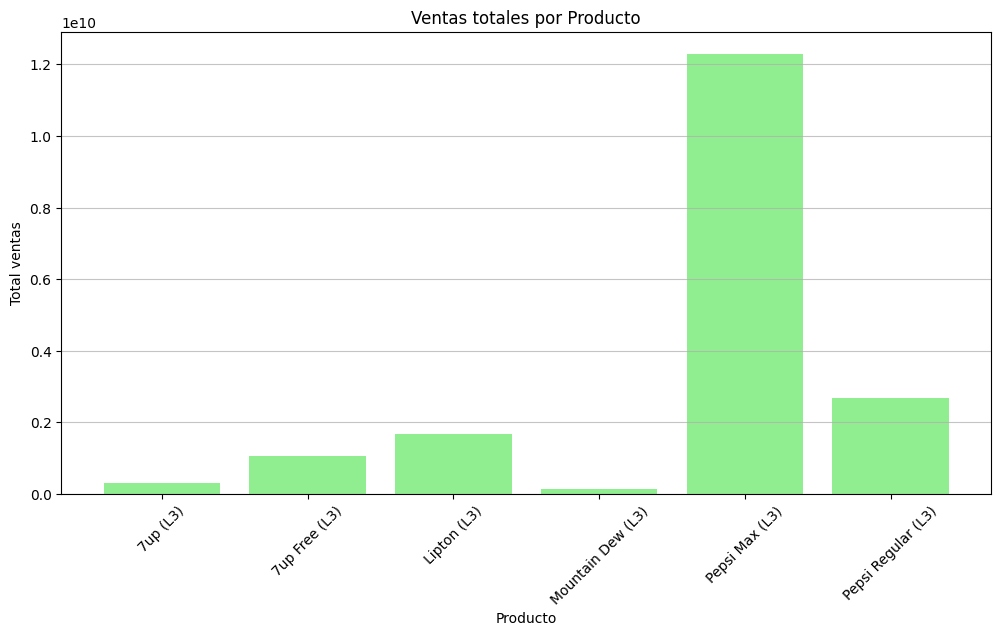

In [ ]:
ventas_producto = df.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(ventas_producto['SUBBRAND'], ventas_producto['AMOUNT'], color='lightgreen')
plt.title('Ventas totales por Producto')
plt.xlabel('Producto')
plt.ylabel('Total ventas')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

El gráfico nos muestra que el producto que más se vende es Pepsi Max siendo el más popular entre los consumidores.
Los otros productos tienen ventas significativamente más bajas, rondando solo algunos millones. Con esto podemos comprobar que no están generando tanto interés o que podrían no ser tan conocidos.
Teniendo en cuenta que Pepsi Max es el más vendido podría ser una oportunidad para que los otros productos aumenten su visibilidad y ventas, analizando o viendo por qué este producto gusta tanto.

In [ ]:
ventas_producto

,SUBBRAND,AMOUNT
0,7up (L3),2.917746e+08
1,7up Free (L3),1.066603e+09
2,Lipton (L3),1.682028e+09
3,Mountain Dew (L3),1.316731e+08
4,Pepsi Max (L3),1.229538e+10
5,Pepsi Regular (L3),2.679291e+09


**TENDENCIA Y ESTACIONALIDAD DEL PAÍS CON MENOS VENTAS**

Para ver el comportamiento de ese país a lo largo del tiempo

Primero agrupamos las ventas por país y las sumamos para identificar el país con menos ventas ya que eso es lo que nos piden y son los datos que vamos a utilizar para representar la tendencia y estacionalidad.
Combinamos las columnas MONTH y YEAR en una nueva llamada DATE que contiene la fecha entera para que nos sea más fácil trabajar con ello.

Luego, agrupamos los datos de esta nueva columna para sumar las ventas mensuales y calcula la tendencia mediante un medio móvil de 3 meses, lo que ayuda a suavizar las fluctuaciones y a ver la dirección general de las ventas. Extraemos el mes de la columna creada de la fecha para calcular la estacionalidad, agrupando las ventas promedio por mes para identificar patrones recurrentes a lo largo del año.

<ipython-input-17-662917bf2999>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pais_menos_ventas['MONTH'] = df_pais_menos_ventas['MONTH'].astype(int)
<ipython-input-17-662917bf2999>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pais_menos_ventas['MONTH'] = df_pais_menos_ventas['MONTH'].apply(lambda x: f'{x:02d}')  # Formato de dos dígitos
<ipython-input-17-662917bf2999>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure par

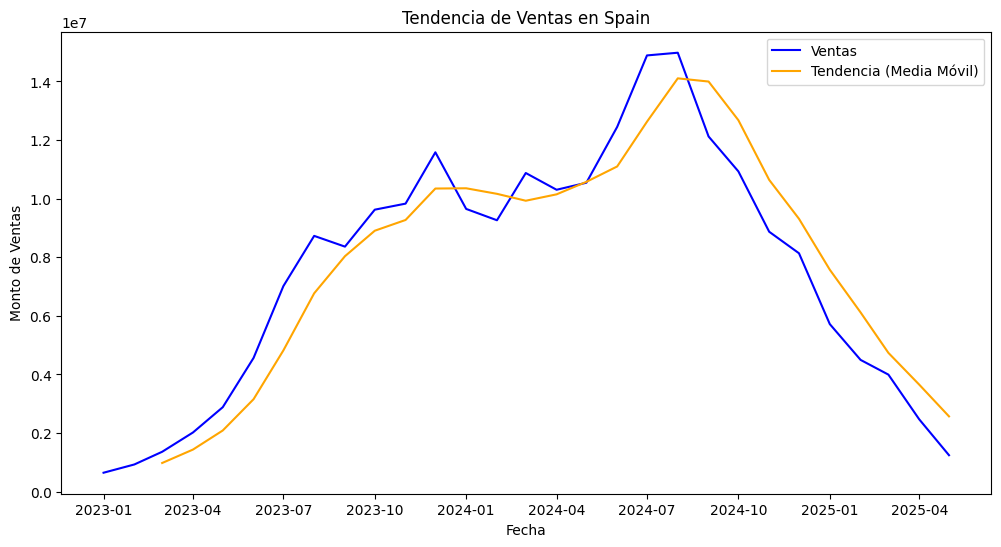

In [ ]:
#agrupamos las ventas por países teniendo en cuenta las cantidades
ventas_pais = df.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

# encontramos el país con menos ventas
pais_menos_ventas = ventas_pais.loc[ventas_pais['AMOUNT'].idxmin()]
#datos a utilizar: país seleccionado con menos ventas
df_pais_menos_ventas = df[df['COUNTRY'] == pais_menos_ventas['COUNTRY']]
df_pais_menos_ventas['MONTH'] = df_pais_menos_ventas['MONTH'].astype(int)

# nueva columna fecha (año + mes)
df_pais_menos_ventas['MONTH'] = df_pais_menos_ventas['MONTH'].apply(lambda x: f'{x:02d}')
df_pais_menos_ventas['DATE'] = pd.to_datetime(df_pais_menos_ventas['MONTH'] + '-' + df_pais_menos_ventas['YEAR'].astype(str))

ventas_mes = df_pais_menos_ventas.groupby('DATE')['AMOUNT'].sum().reset_index()

# tendencia
ventas_mes['Trend'] = ventas_mes['AMOUNT'].rolling(window=3).mean()

# estacionalidad
ventas_mes['Month'] = ventas_mes['DATE'].dt.month
seasonal_sales = ventas_mes.groupby('Month')['AMOUNT'].mean().reset_index()

# graficamos
plt.figure(figsize=(12, 6))
plt.plot(ventas_mes['DATE'], ventas_mes['AMOUNT'], label='Ventas', color='blue')
plt.plot(ventas_mes['DATE'], ventas_mes['Trend'], label='Tendencia (Media Móvil)', color='orange')
plt.title(f'Tendencia de Ventas en {pais_menos_ventas["COUNTRY"]}')
plt.xlabel('Fecha')
plt.ylabel('Monto de Ventas')
plt.legend()
plt.show()

El gráfico muestra un comportamiento general positivo, ya que la línea azul, que representa las ventas totales, indica un aumento a lo largo del tiempo. A pesar de ser el país con menos ventas, la tendencia muestra un crecimiento sostenido, lo que nos indica que la empresa está comenzando a estabilizarse y expandirse en este mercado. La línea amarilla, que representa la media móvil, suaviza las fluctuaciones mensuales, de manera que resalta, aunque hay picos y caídas, la dirección general de las ventas sigue siendo ascendente.

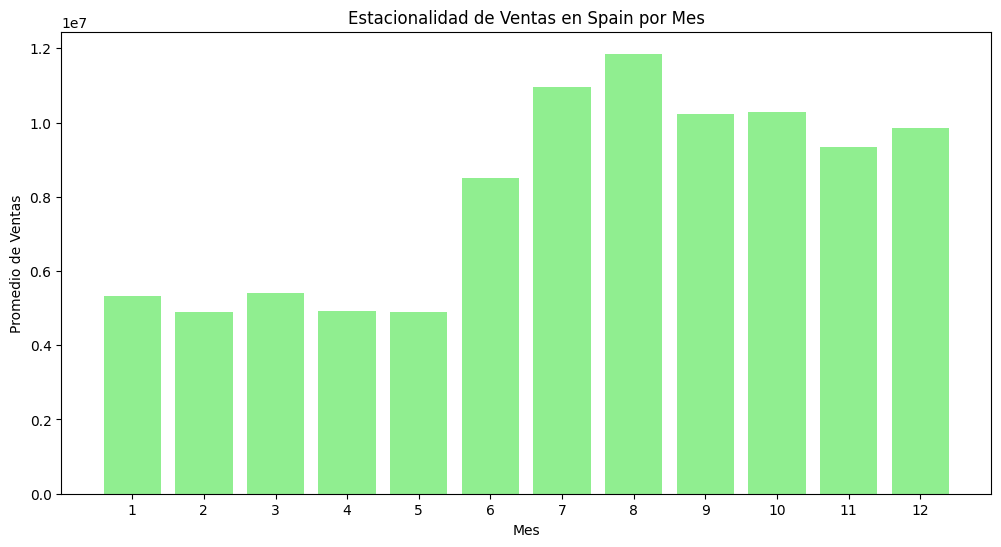

In [ ]:
# estacionalidad
plt.figure(figsize=(12, 6))
plt.bar(seasonal_sales['Month'], seasonal_sales['AMOUNT'], color='lightgreen')
plt.title(f'Estacionalidad de Ventas en {pais_menos_ventas["COUNTRY"]} por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Ventas')
plt.xticks(range(1, 13))
plt.show()

Podemos observar patrones significativos en el comportamiento de consumo a lo largo del año. Si nos fijamos, en los meses de verano, como junio, julio y agosto, muestran barras más altas, lo que se refiere a un aumento en la demanda, posiblemente debido a las vacaciones. Por otro lado, meses como diciembre, enero y febrero, indican una reducción en el consumo durante estos períodos, lo que puede deberse a factores climáticos o cambios en los hábitos de compra.

In [ ]:
print("País con menos ventas:", pais_menos_ventas)

País con menos ventas: COUNTRY               Spain
AMOUNT     218493569.403429
Name: 8, dtype: object


**CUÁLES SON LAS PREDICCIONES HECHAS EN ESPAÑA Y CÓMO DE BUENAS SON**

Tenemos en cuenta solo los datos de España

In [ ]:
# datos España
spain = df[df['COUNTRY'] == 'Spain']

Separamos las predicciones de los datos reales para poder comparar

In [ ]:
predicciones = spain[spain['SCENARIO'] == 'AI_forecast']
reales = spain[spain['SCENARIO'] == 'actual']

In [ ]:
# Agrupar por fecha y sumar ventas
predicciones2 = predicciones.groupby('DATE')['AMOUNT'].sum().reset_index()
reales2 = reales.groupby('DATE')['AMOUNT'].sum().reset_index()


<ipython-input-23-31515c3c582b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicciones['DATE'] = pd.to_datetime(predicciones[['YEAR', 'MONTH']].assign(DAY=1))
<ipython-input-23-31515c3c582b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reales['DATE'] = pd.to_datetime(reales[['YEAR', 'MONTH']].assign(DAY=1))


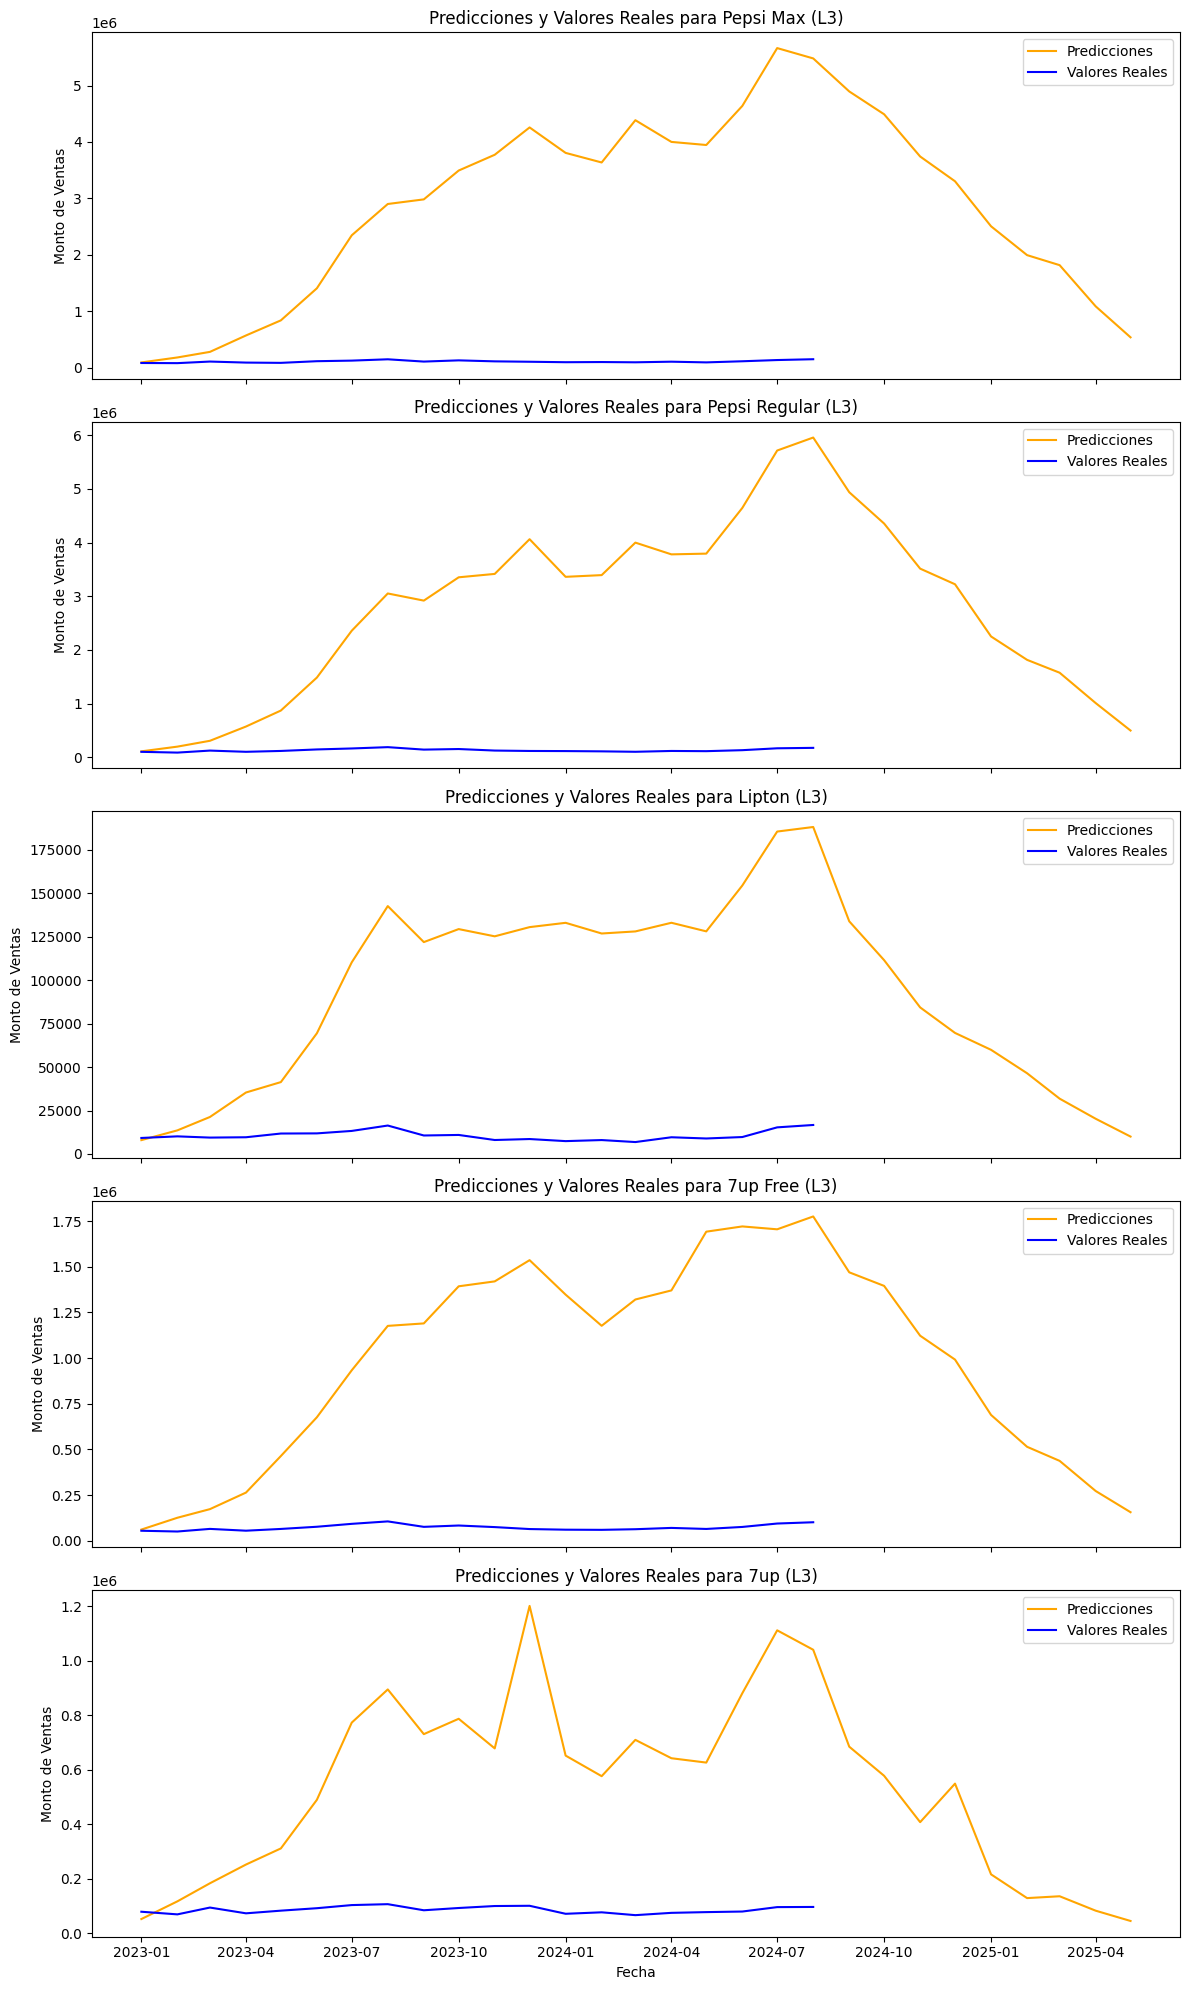

In [ ]:
## Asegúrate de que los datos están bien preparados
# Crear una nueva columna de fecha para ambos conjuntos
predicciones['DATE'] = pd.to_datetime(predicciones[['YEAR', 'MONTH']].assign(DAY=1))
reales['DATE'] = pd.to_datetime(reales[['YEAR', 'MONTH']].assign(DAY=1))

# Agrupar por producto y fecha
predicciones2 = predicciones.groupby(['DATE', 'SUBBRAND'])['AMOUNT'].sum().reset_index()
reales2 = reales.groupby(['DATE', 'SUBBRAND'])['AMOUNT'].sum().reset_index()

# Filtrar por productos únicos
productos_unicos = predicciones['SUBBRAND'].unique()

# Crear subgráficos
n = len(productos_unicos)
fig, axs = plt.subplots(n, 1, figsize=(12, 4 * n), sharex=True)

for i, producto in enumerate(productos_unicos):
    # Filtrar datos por producto
    predicciones_producto = predicciones2[predicciones2['SUBBRAND'] == producto]
    valores_reales_producto = reales2[reales2['SUBBRAND'] == producto]

    # Graficar las predicciones
    axs[i].plot(predicciones_producto['DATE'], predicciones_producto['AMOUNT'], label='Predicciones', color='orange')
    axs[i].plot(valores_reales_producto['DATE'], valores_reales_producto['AMOUNT'], label='Valores Reales', color='blue')

    axs[i].set_title(f'Predicciones y Valores Reales para {producto}')
    axs[i].set_ylabel('Monto de Ventas')
    axs[i].legend()

plt.xlabel('Fecha')
plt.tight_layout()
plt.show()



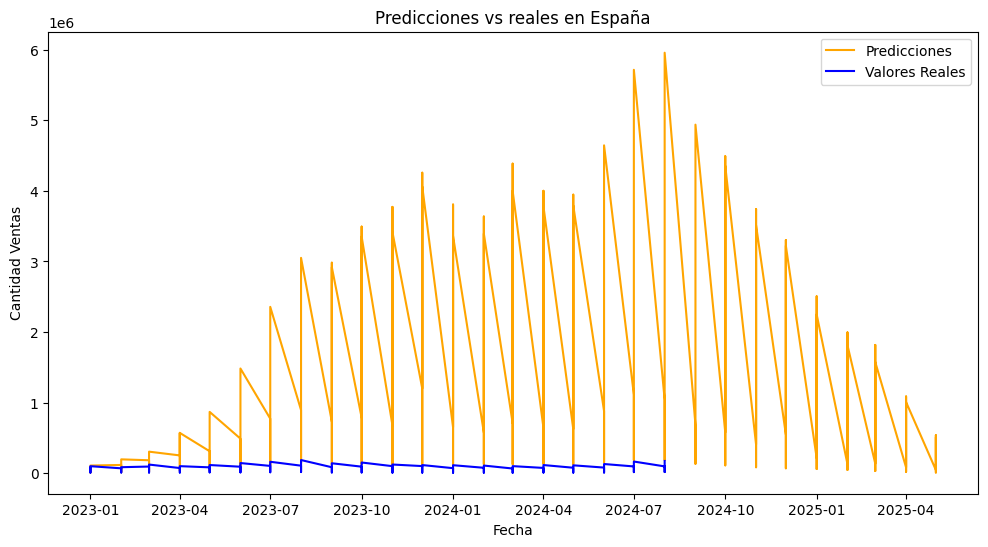

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(predicciones2['DATE'], predicciones2['AMOUNT'], label='Predicciones', color='orange')
plt.plot(reales2['DATE'], reales2['AMOUNT'], label='Valores Reales', color='blue')
plt.title('Predicciones vs reales en España')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Ventas')
plt.legend()
plt.show()

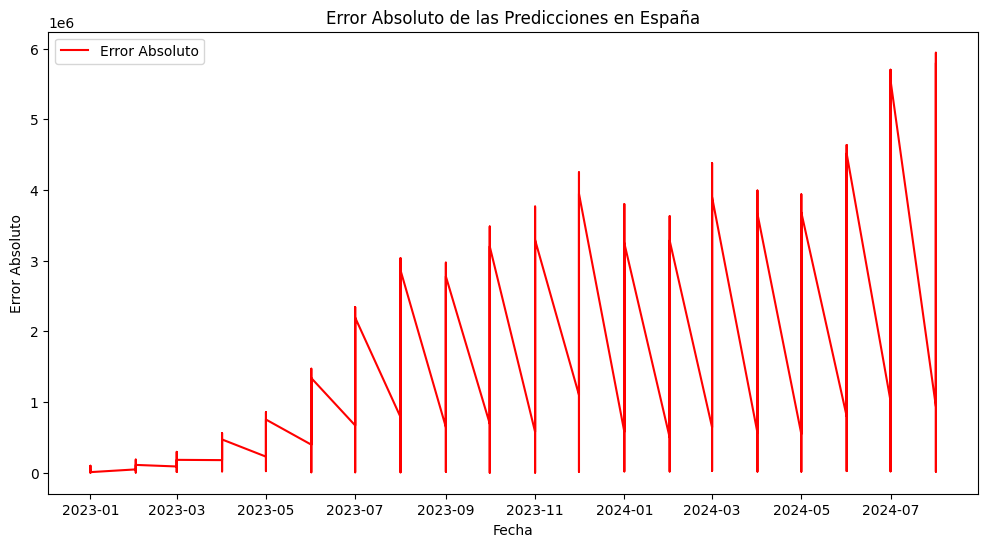

In [ ]:
# Merge para comparar predicciones y reales
merged_data = pd.merge(predicciones2, reales2, on='DATE', suffixes=('_pred', '_real'))

# Calcular el error
merged_data['Error'] = merged_data['AMOUNT_real'] - merged_data['AMOUNT_pred']
merged_data['Absolute Error'] = merged_data['Error'].abs()
plt.figure(figsize=(12, 6))
plt.plot(merged_data['DATE'], merged_data['Absolute Error'], label='Error Absoluto', color='red')
plt.title('Error Absoluto de las Predicciones en España')
plt.xlabel('Fecha')
plt.ylabel('Error Absoluto')
plt.legend()
plt.show()


In [ ]:
mae = merged_data['Absolute Error'].mean()
print(f'Error Medio Absoluto (MAE): {mae}')

Error Medio Absoluto (MAE): 1449151.4812782786
